# Coordinate Reference Systems

Converting earth surface in 2 dimension
- map projection to render it as a flat surface
 - equal-area projections - preserving area of the map
 - equidistant projections - preserving the distance in the map

In [1]:
import geopandas as gpd
import pandas as pd

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/geospatial-learn-course-data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/geospatial-learn-course-data/CA_county_median_age.csv
/kaggle/input/geospatial-learn-course-data/top_universities.csv
/kaggle/input/geospatial-learn-course-data/japan-prefecture-population.csv
/kaggle/input/geospatial-learn-course-data/CA_county_population.csv
/kaggle/input/geospatial-learn-course-data/earthquakes1970-2014.csv
/kaggle/input/geospatial-learn-course-data/Philippines_AL258.kml
/kaggle/input/geospatial-learn-course-data/starbucks_locations.csv
/kaggle/input/geospatial-learn-course-data/purple_martin.csv
/kaggle/input/geospatial-learn-course-data/CA_county_high_earners.csv
/kaggle/input/geospatial-learn-course-data/PhillyHealth_Air_Monitoring_Stations/PhillyHealth_Air_Monitoring_Stations/PhillyHealth_Air_Monitoring_Stations.cpg
/kaggle/input/geospatial-learn-course-data/PhillyHealth_Air_Monitoring_Stations/PhillyHealth_Air_Monitoring_Stations/PhillyHealth_Air_Monitoring_Stations.shx
/kaggle/input/geospatial-learn-course-data/PhillyHealth_Air_Monitoring_Station

Setting the CRS

coordinate reference system (CRS) to show how the projected points correspond to real locations on Earth. In this tutorial, you'll learn more about coordinate reference systems, along with how to use them in GeoPandas.

In [3]:
regions =gpd.read_file("../input/geospatial-learn-course-data/ghana/ghana/Regions/Map_of_Regions_in_Ghana.shp")
print(regions.crs)

EPSG:32630


In [4]:
# Create a DataFrame with health facilities in Ghana
facilities_df = pd.read_csv("../input/geospatial-learn-course-data/ghana/ghana/health_facilities.csv")

In [5]:
facilities_df.head()

,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude
0,Ashanti,Offinso North,A.M.E Zion Clinic,Clinic,Afrancho,CHAG,7.40801,-1.96317
1,Ashanti,Bekwai Municipal,Abenkyiman Clinic,Clinic,Anwiankwanta,Private,6.46312,-1.58592
2,Ashanti,Adansi North,Aboabo Health Centre,Health Centre,Aboabo No 2,Government,6.22393,-1.34982
3,Ashanti,Afigya-Kwabre,Aboabogya Health Centre,Health Centre,Aboabogya,Government,6.84177,-1.61098
4,Ashanti,Kwabre,Aboaso Health Centre,Health Centre,Aboaso,Government,6.84177,-1.61098


In [6]:
# Convert the DataFrame to a GeoDataFrame
facilities = gpd.GeoDataFrame(facilities_df, geometry=gpd.points_from_xy(facilities_df.Longitude,facilities_df.Latitude))

In [7]:
facilities.head()

,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude,geometry
0,Ashanti,Offinso North,A.M.E Zion Clinic,Clinic,Afrancho,CHAG,7.40801,-1.96317,POINT (-1.96317 7.40801)
1,Ashanti,Bekwai Municipal,Abenkyiman Clinic,Clinic,Anwiankwanta,Private,6.46312,-1.58592,POINT (-1.58592 6.46312)
2,Ashanti,Adansi North,Aboabo Health Centre,Health Centre,Aboabo No 2,Government,6.22393,-1.34982,POINT (-1.34982 6.22393)
3,Ashanti,Afigya-Kwabre,Aboabogya Health Centre,Health Centre,Aboabogya,Government,6.84177,-1.61098,POINT (-1.61098 6.84177)
4,Ashanti,Kwabre,Aboaso Health Centre,Health Centre,Aboaso,Government,6.84177,-1.61098,POINT (-1.61098 6.84177)


In [8]:
# Set the coordinate reference system (CRS) to EPSG 4326
facilities.crs ={'init':'epsg:4326'}

/usr/local/lib/python3.11/dist-packages/pyproj/crs/crs.py:143: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [9]:
facilities.head()

,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude,geometry
0,Ashanti,Offinso North,A.M.E Zion Clinic,Clinic,Afrancho,CHAG,7.40801,-1.96317,POINT (-1.96317 7.40801)
1,Ashanti,Bekwai Municipal,Abenkyiman Clinic,Clinic,Anwiankwanta,Private,6.46312,-1.58592,POINT (-1.58592 6.46312)
2,Ashanti,Adansi North,Aboabo Health Centre,Health Centre,Aboabo No 2,Government,6.22393,-1.34982,POINT (-1.34982 6.22393)
3,Ashanti,Afigya-Kwabre,Aboabogya Health Centre,Health Centre,Aboabogya,Government,6.84177,-1.61098,POINT (-1.61098 6.84177)
4,Ashanti,Kwabre,Aboaso Health Centre,Health Centre,Aboaso,Government,6.84177,-1.61098,POINT (-1.61098 6.84177)


# Re-projection

<Axes: >

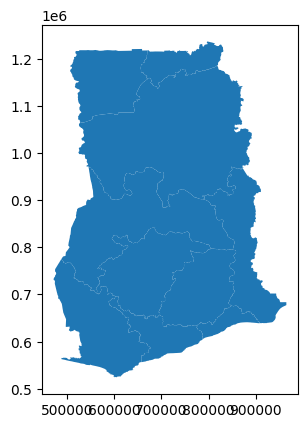

In [10]:
regions.plot()

<Axes: >

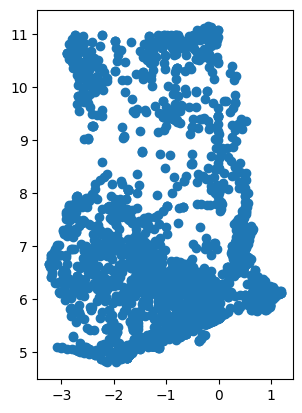

In [11]:
facilities.plot()

the to_crs() method modifies the geometry column. 

<Axes: >

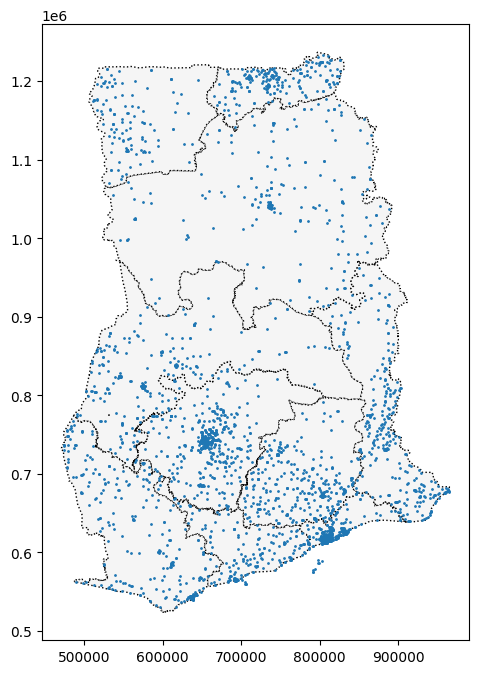

In [12]:
ax = regions.plot(figsize=(8,8),color='whitesmoke',linestyle=':',edgecolor='black')
facilities.to_crs(epsg=32630).plot(markersize=1, ax=ax)

In [13]:
facilities.head()

,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude,geometry
0,Ashanti,Offinso North,A.M.E Zion Clinic,Clinic,Afrancho,CHAG,7.40801,-1.96317,POINT (-1.96317 7.40801)
1,Ashanti,Bekwai Municipal,Abenkyiman Clinic,Clinic,Anwiankwanta,Private,6.46312,-1.58592,POINT (-1.58592 6.46312)
2,Ashanti,Adansi North,Aboabo Health Centre,Health Centre,Aboabo No 2,Government,6.22393,-1.34982,POINT (-1.34982 6.22393)
3,Ashanti,Afigya-Kwabre,Aboabogya Health Centre,Health Centre,Aboabogya,Government,6.84177,-1.61098,POINT (-1.61098 6.84177)
4,Ashanti,Kwabre,Aboaso Health Centre,Health Centre,Aboaso,Government,6.84177,-1.61098,POINT (-1.61098 6.84177)


In [14]:
facilities.to_crs(epsg=32630).head()

,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude,geometry
0,Ashanti,Offinso North,A.M.E Zion Clinic,Clinic,Afrancho,CHAG,7.40801,-1.96317,POINT (614422.662 818986.851)
1,Ashanti,Bekwai Municipal,Abenkyiman Clinic,Clinic,Anwiankwanta,Private,6.46312,-1.58592,POINT (656373.863 714616.547)
2,Ashanti,Adansi North,Aboabo Health Centre,Health Centre,Aboabo No 2,Government,6.22393,-1.34982,POINT (682573.395 688243.477)
3,Ashanti,Afigya-Kwabre,Aboabogya Health Centre,Health Centre,Aboabogya,Government,6.84177,-1.61098,POINT (653484.490 756478.812)
4,Ashanti,Kwabre,Aboaso Health Centre,Health Centre,Aboaso,Government,6.84177,-1.61098,POINT (653484.490 756478.812)


If EPSG Code is not avilable in Geopandas, we can change the CRS using "proj4 string" of the CRS

In [15]:
# Change the CRS to EPSG 4326
regions.to_crs("+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs").head()

,Region,geometry
0,Ashanti,"POLYGON ((-1.30985 7.62302, -1.30786 7.62198, ..."
1,Brong Ahafo,"POLYGON ((-2.54567 8.76089, -2.54473 8.76071, ..."
2,Central,"POLYGON ((-2.06723 6.29473, -2.06658 6.29420, ..."
3,Eastern,"POLYGON ((-0.21751 7.21009, -0.21747 7.20993, ..."
4,Greater Accra,"POLYGON ((0.23456 6.10986, 0.23484 6.10974, 0...."


# Attribute of geometric objects

The type in the geomentry column depends on what we are trying to show: for instance, we might use:

- a point for the epicenter of an earthquake.
- a linestring for a street or
- a polygon to show contry boundaries

In [16]:
facilities.geometry.head()

0    POINT (-1.96317 7.40801)
1    POINT (-1.58592 6.46312)
2    POINT (-1.34982 6.22393)
3    POINT (-1.61098 6.84177)
4    POINT (-1.61098 6.84177)
Name: geometry, dtype: geometry

Calculating Area in Square meter

In [17]:
# Calculate the area (in square meters) of each polygon in the GeoDataFrame 
regions.loc[:, "AREA"] = regions.geometry.area / 10**6

print("Area of Ghana: {} square kilometers".format(regions.AREA.sum()))
print("CRS:", regions.crs)
regions.head()

Area of Ghana: 239584.5760055668 square kilometers
CRS: EPSG:32630


,Region,geometry,AREA
0,Ashanti,"POLYGON ((686446.075 842986.894, 686666.193 84...",24379.017777
1,Brong Ahafo,"POLYGON ((549970.457 968447.094, 550073.003 96...",40098.168231
2,Central,"POLYGON ((603176.584 695877.238, 603248.424 69...",9665.626760
3,Eastern,"POLYGON ((807307.254 797910.553, 807311.908 79...",18987.625847
4,Greater Accra,"POLYGON ((858081.638 676424.913, 858113.115 67...",3706.511145
